## 1. <a name="1">Business Understanding: Understand the problem and objectives.</a>


The main objective of this analysis is to understand if marketing strategy of the business has been effective, it means, predict whether a customer, when contacted, will sign up for a term deposit.


In [ ]:
# Google Colab
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
dir_path = "/content/drive/MyDrive/Colab_Notebooks/BIAAF_MBIA/Trabalho de Grupo/bank.csv"
df = pd.read_csv(dir_path, sep= ';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. <a name="1">Data Understanding: Explore and familiarize oneself with the data.</a>

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20113 entries, 0 to 20112
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             20113 non-null  int64  
 1   job             20113 non-null  object 
 2   marital         20113 non-null  object 
 3   education       20113 non-null  object 
 4   default         20113 non-null  object 
 5   housing         20113 non-null  object 
 6   loan            20113 non-null  object 
 7   contact         20113 non-null  object 
 8   month           20113 non-null  object 
 9   day_of_week     20113 non-null  object 
 10  duration        20113 non-null  int64  
 11  campaign        20113 non-null  int64  
 12  pdays           20113 non-null  int64  
 13  previous        20113 non-null  int64  
 14  poutcome        20113 non-null  object 
 15  emp.var.rate    20113 non-null  float64
 16  cons.price.idx  20113 non-null  float64
 17  cons.conf.idx   20113 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,20113.000000,20113.000000,20113.000000,20113.0,20113.0,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000
mean,39.943370,260.628400,2.898623,999.0,0.0,1.284209,94.035866,-39.649033,4.915337,5213.780540
std,9.300138,262.008596,3.384313,0.0,0.0,0.146051,0.260444,2.997219,0.051498,18.061596
min,19.000000,0.000000,1.000000,999.0,0.0,1.100000,93.444000,-42.700000,4.855000,5191.000000
25%,32.000000,104.000000,1.000000,999.0,0.0,1.100000,93.918000,-42.700000,4.858000,5191.000000
50%,39.000000,180.000000,2.000000,999.0,0.0,1.400000,93.994000,-41.800000,4.958000,5228.100000
75%,47.000000,320.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,61.000000,3643.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.100000,4.970000,5228.100000


In [ ]:
df.nunique()

age                 43
job                 12
marital              4
education            8
default              2
housing              3
loan                 3
contact              2
month                4
day_of_week          5
duration          1332
campaign            42
pdays                1
previous             1
poutcome             1
emp.var.rate         2
cons.price.idx       4
cons.conf.idx        4
euribor3m           24
nr.employed          2
y                    2
dtype: int64

In [ ]:
df = df.drop(columns=['pdays', 'previous', 'poutcome'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,1.1,93.994,-36.4,4.857,5191.0,no


## 3. <a name="1">Data Preparation: Clean and preprocess the data.</a>

In [ ]:
model_features = df.columns.drop('y')
model_target = 'y'

In [ ]:
import numpy as np

numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:', numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:', categorical_features_all)

Numerical columns: Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object')


age


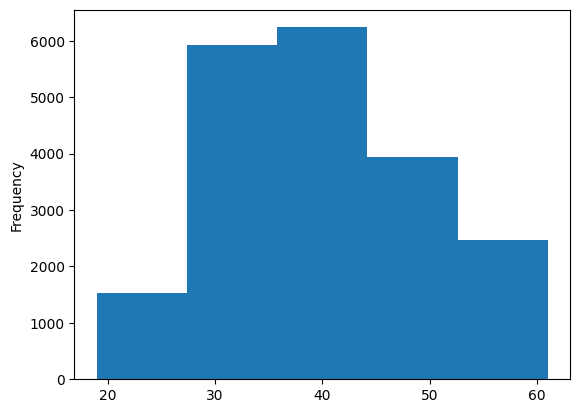

duration


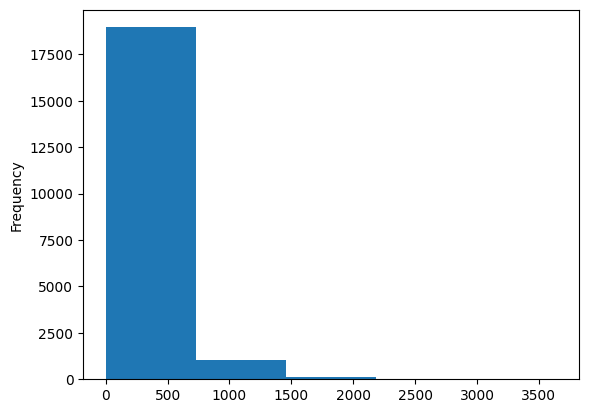

campaign


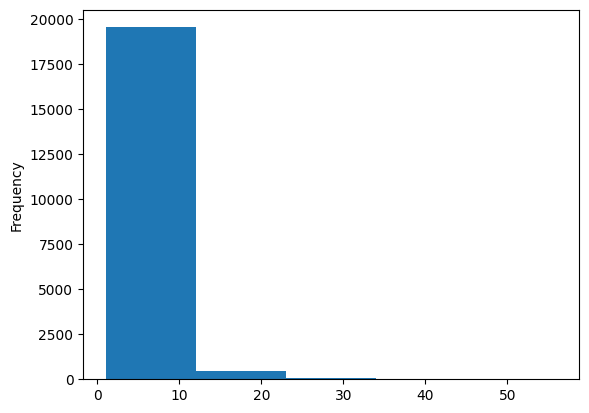

emp.var.rate


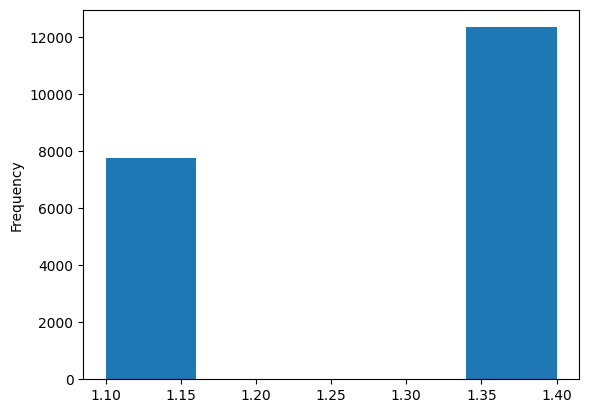

cons.price.idx


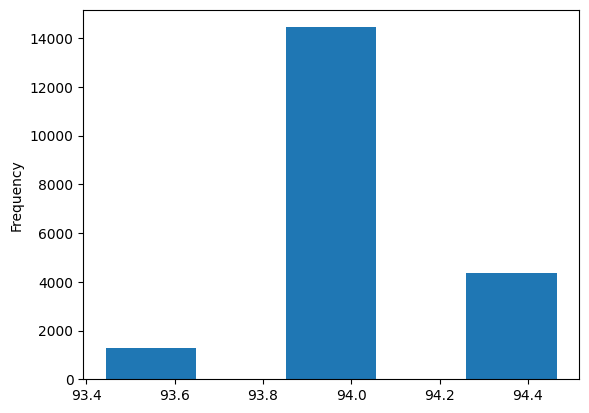

cons.conf.idx


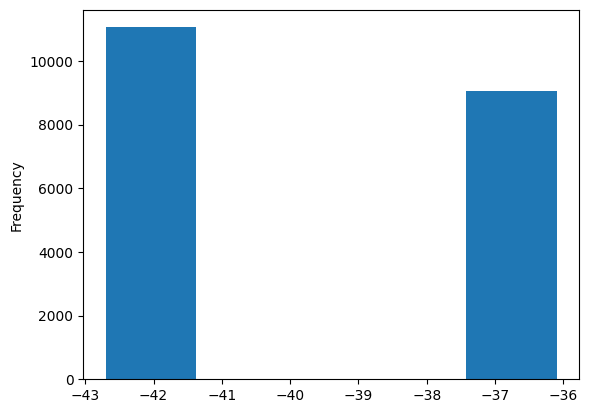

euribor3m


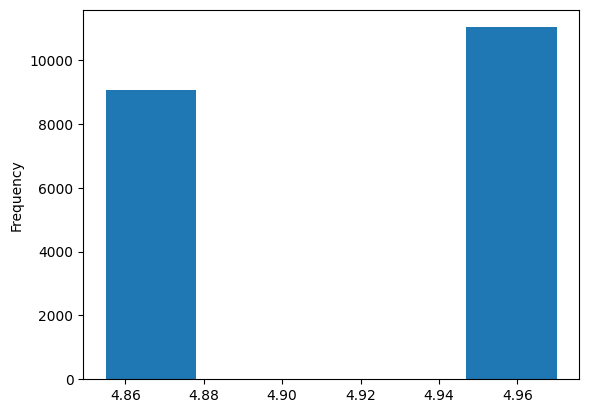

nr.employed


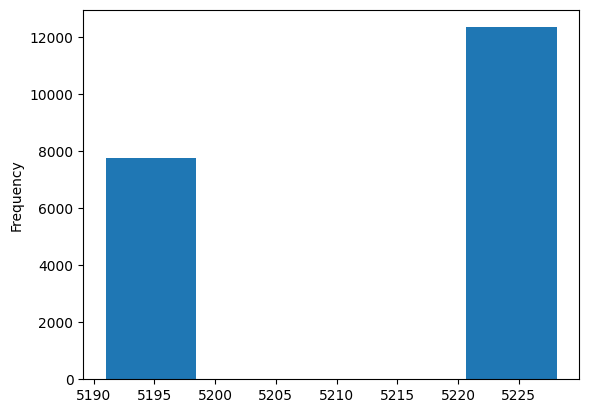

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

job


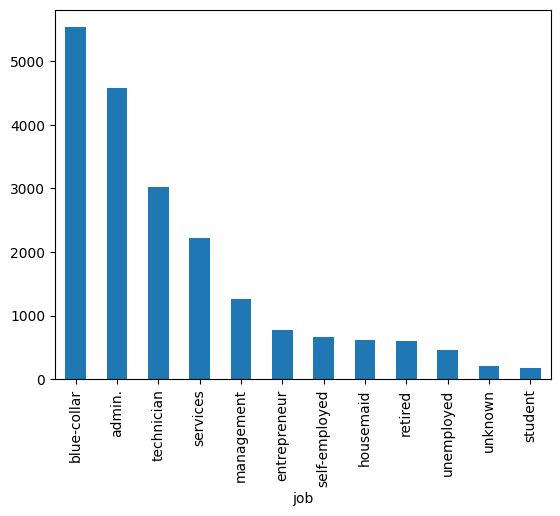

marital


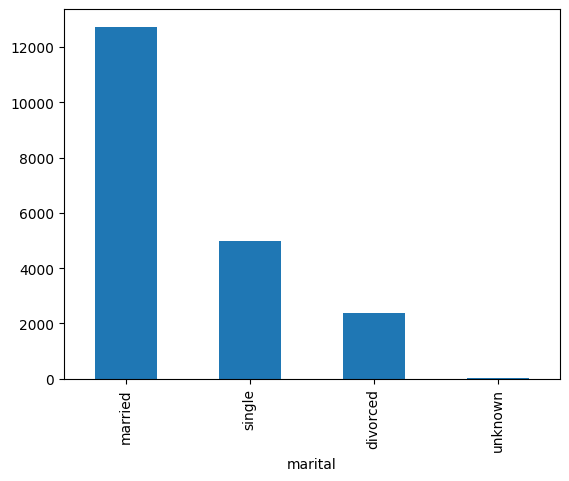

education


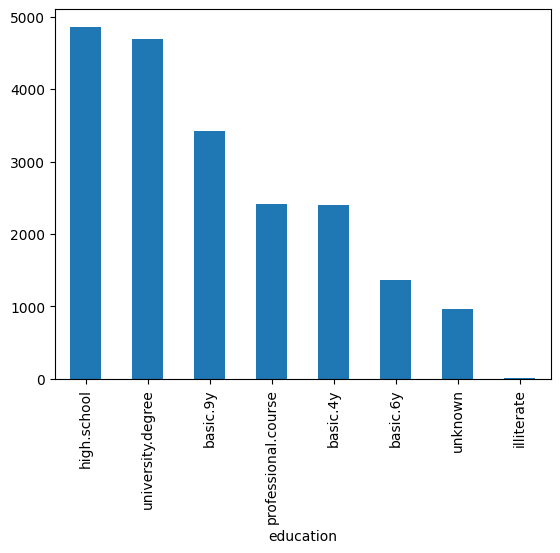

default


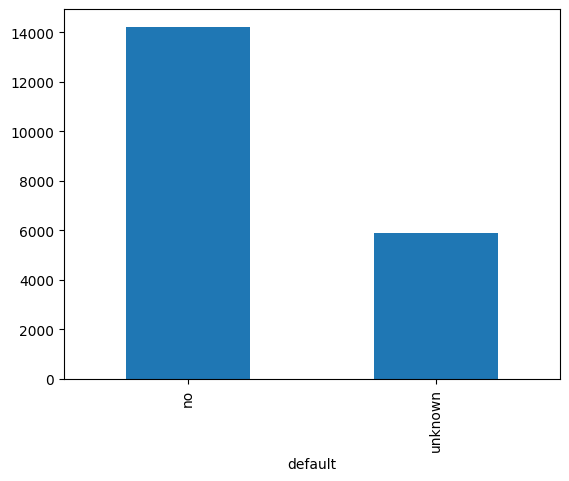

housing


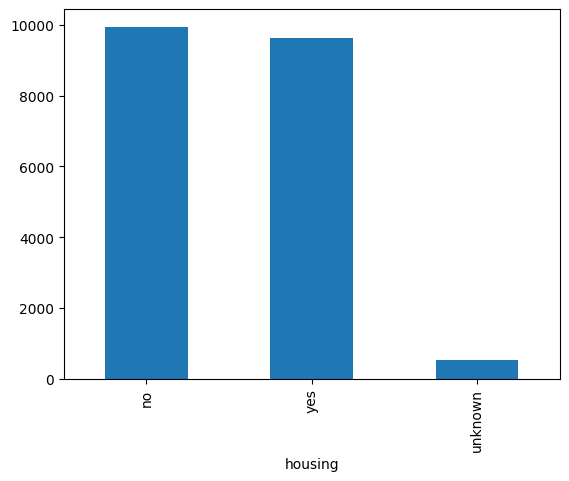

loan


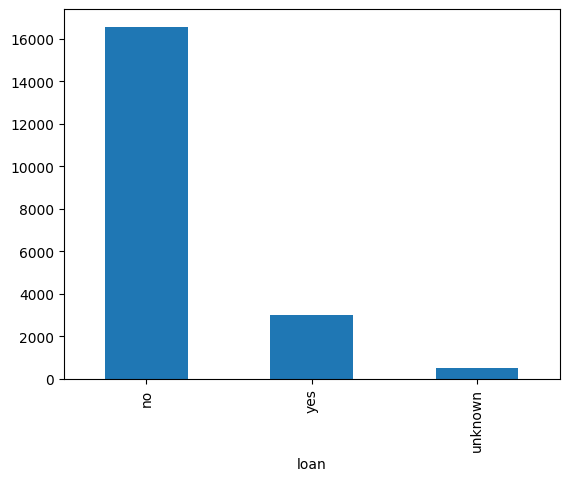

contact


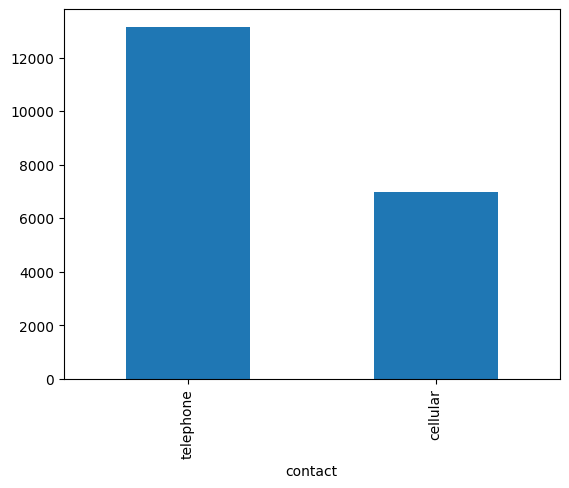

month


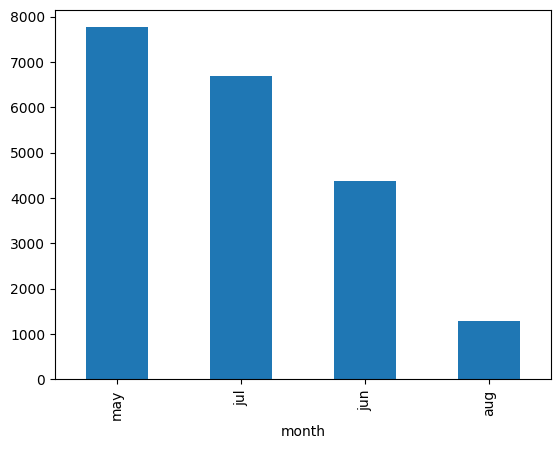

day_of_week


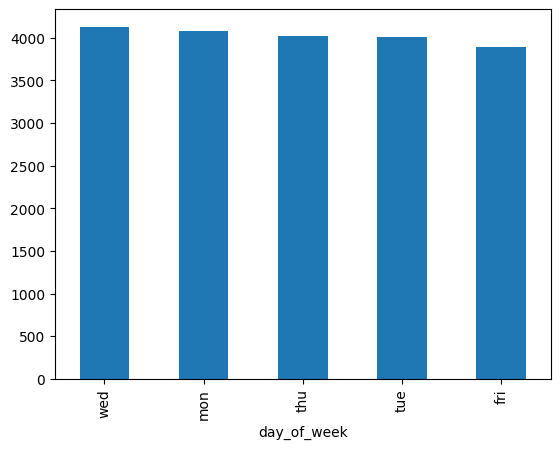

In [ ]:
for c in categorical_features_all:
    print(c)
    df[c].value_counts().plot.bar()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class NO samples in the training set:', sum(train_data[model_target] == 'no'))
print('Class YES samples in the training set:', sum(train_data[model_target] == 'yes'))

print('Class NO samples in the test set:', sum(test_data[model_target] == 'no'))
print('Class YES samples in the test set:', sum(test_data[model_target] == 'yes'))

Training set shape: (16090, 18)
Class NO samples in the training set: 15343
Class YES samples in the training set: 747
Class NO samples in the test set: 3852
Class YES samples in the test set: 171


In [ ]:
from sklearn.utils import shuffle

class_NO_no = train_data[train_data[model_target] == 'no']
class_YES_no = train_data[train_data[model_target] == 'yes']

upsampled_class_YES_no = class_YES_no.sample(n=len(class_NO_no), replace=True, random_state=42)

train_data = pd.concat([class_NO_no, upsampled_class_YES_no])
train_data = shuffle(train_data)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class YES samples in the training set:', sum(train_data[model_target] == 'yes'))
print('Class NO samples in the training set:', sum(train_data[model_target] == 'no'))

Training set shape: (30686, 18)
Class YES samples in the training set: 15343
Class NO samples in the training set: 15343


## 4. <a name="1">Modeling: Build and evaluate models.</a>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', StandardScaler())
                                ])

# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
                                ])
# Combine all data preprocessors from above
data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features_all),
    ('categorical_pre', categorical_processor, categorical_features_all)
                                    ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', KNeighborsClassifier(n_neighbors = 3))
                    ])

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[15006   337]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      0.98      0.99     15343
         yes       0.98      1.00      0.99     15343

    accuracy                           0.99     30686
   macro avg       0.99      0.99      0.99     30686
weighted avg       0.99      0.99      0.99     30686

Accuracy (training): 0.9890177931304178
[[3683  169]
 [ 114   57]]
              precision    recall  f1-score   support

          no       0.97      0.96      0.96      3852
         yes       0.25      0.33      0.29       171

    accuracy                           0.93      4023
   macro avg       0.61      0.64      0.63      4023
weighted avg       0.94      0.93      0.93      4023

Accuracy (test): 0.9296544867014666


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid={'dt__n_neighbors': [1, 2, 3, 4, 5, 6],
           }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical_pre',
                                                                         Pipelin...t_imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('cat_encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                                       ('dt',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1, param_grid={'dt__n_neighbors': [1, 2, 3, 4, 5, 6]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'dt__n_neighbors': 1}
0.9868018412852233


In [ ]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

X_test = test_data[model_features]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the train set:
[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Train accuracy: 1.0
Model performance on the test set:
[[3770   82]
 [ 133   38]]
              precision    recall  f1-score   support

          no       0.97      0.98      0.97      3852
         yes       0.32      0.22      0.26       171

    accuracy                           0.95      4023
   macro avg       0.64      0.60      0.62      4023
weighted avg       0.94      0.95      0.94      4023

Test accuracy: 0.9465572955505841


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', RandomForestClassifier(n_estimators = 200, max_features = 7))
                    ])

set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt',
                 RandomForestClassifier(max_features=7, n_estimators=200))])

In [ ]:
# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Accuracy (training): 1.0
[[3794   58]
 [ 119   52]]
              precision    recall  f1-score   support

          no       0.97      0.98      0.98      3852
         yes       0.47      0.30      0.37       171

    accuracy                           0.96      4023
   macro avg       0.72      0.64      0.67      4023
weighted avg       0.95      0.96      0.95      4023

Accuracy (test): 0.9560029828486204


In [ ]:
### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid={'dt__n_estimators': [150, 200, 250],
            'dt__max_features': [6, 7, 8]
           }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical_pre',
                                                                         Pipelin...
                                                                                                        strategy='constant')),
                                                                                         ('cat_encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                                       ('dt',
                                        RandomForestClassifier(max_features=7,
                                                               n_estimators=200))]),
             n_jobs=-1,
             param_grid={'dt__max_features': [6, 7, 8],
                         'dt__n_estimators': [150, 200, 250]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'dt__max_features': 6, 'dt__n_estimators': 150}
0.9900280193961566


In [ ]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt',
                 RandomForestClassifier(max_features=6, n_estimators=150))])

In [ ]:
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

X_test = test_data[model_features]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the train set:
[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Train accuracy: 1.0
Model performance on the test set:
[[3798   54]
 [ 126   45]]
              precision    recall  f1-score   support

          no       0.97      0.99      0.98      3852
         yes       0.45      0.26      0.33       171

    accuracy                           0.96      4023
   macro avg       0.71      0.62      0.66      4023
weighted avg       0.95      0.96      0.95      4023

Test accuracy: 0.9552572706935123


In [ ]:
%pip install lightgbm==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
import lightgbm as lgb

lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc'],
    'n_estimators': 50,
    'learning_rate': 0.1,
    'num_iterations': 1000
}

pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('dt', lgb.LGBMClassifier(**lgb_params))
                    ])

set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt',
                 LGBMClassifier(metric=['auc'], n_estimators=50,
                                num_iterations=1000, objective='binary'))])

In [ ]:
# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Accuracy (training): 1.0
[[3746  106]
 [  81   90]]
              precision    recall  f1-score   support

          no       0.98      0.97      0.98      3852
         yes       0.46      0.53      0.49       171

    accuracy                           0.95      4023
   macro avg       0.72      0.75      0.73      4023
weighted avg       0.96      0.95      0.96      4023

Accuracy (test): 0.9535172756649267


In [ ]:
### PIPELINE GRID_SEARCH ###
############################

# Parameter grid for GridSearch
param_grid={'dt__boosting_type': ['gbdt'],
            'dt__objective': ['binary'],
            'dt__metric': ['auc'],
            'dt__n_estimators': [20, 30, 40],
            'dt__learning_rate': [0.1],
            'dt__num_iterations': [1500, 1700, 2000]
           }

grid_search = GridSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pre',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('categorical_pre',
                                                                         Pipelin...
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                                       ('dt',
                                        LGBMClassifier(metric=['auc'],
                                                       n_estimators=50,
                                                       num_iterations=1000,
                                                       objective='binary'))]),
             n_jobs=-1,
             param_grid={'dt__boosting_type': ['gbdt'],
                         'dt__learning_rate': [0.1], 'dt__metric': ['auc'],
                         'dt__n_estimators': [20, 30, 40],
                         'dt__num_iterations': [1500, 1700, 2000],
                         'dt__objective': ['binary']},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'dt__boosting_type': 'gbdt', 'dt__learning_rate': 0.1, 'dt__metric': 'auc', 'dt__n_estimators': 20, 'dt__num_iterations': 2000, 'dt__objective': 'binary'}
0.9857589917795861


In [ ]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('dt',
                 LGBMClassifier(metric='auc', n_estimators=20,
                                num_iterations=2000, objective='binary'))])

In [ ]:
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

X_test = test_data[model_features]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the train set:
[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Train accuracy: 1.0
Model performance on the test set:
[[3762   90]
 [  93   78]]
              precision    recall  f1-score   support

          no       0.98      0.98      0.98      3852
         yes       0.46      0.46      0.46       171

    accuracy                           0.95      4023
   macro avg       0.72      0.72      0.72      4023
weighted avg       0.95      0.95      0.95      4023

Test accuracy: 0.9545115585384042


In [ ]:
from sklearn.ensemble import VotingClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_rf = RandomForestClassifier(n_estimators = 200, max_features = 7)

lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['auc'],
    'n_estimators': 50,
    'learning_rate': 0.1,
    'num_iterations': 1000,
    'is_unbalance': True
}

classifier_lgbm = lgb.LGBMClassifier(**lgb_params)

weights = [0.05, 0.05, 0.9]  # For rf, knn, and lgbm respectively


voting_class = VotingClassifier(estimators=[('rf', classifier_rf), ('knn', classifier_knn), ('lgbm', classifier_lgbm)],
                                voting='soft',
                                weights=weights)

In [ ]:
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('voting', voting_class)
                    ])

set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   Simp...
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week'],
      dtype='object'))])),
                ('voting',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_features=7,
                                                                      n_estimators=200)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lgbm',
                                               LGBMClassifier(is_unbalance=True,
                                                              metric=['auc'],
                                                              n_estimators=50,
                                                              num_iterations=1000,
                                                              objective='binary'))],
                                  voting='soft', weights=[0.05, 0.05, 0.9]))])

## 5. <a name="1">Evaluation: Assess the performance of the models.</a>

In [ ]:
# Get train data to train the pipeline
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

# Get test data to test the pipeline
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[[15343     0]
 [    0 15343]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     15343
         yes       1.00      1.00      1.00     15343

    accuracy                           1.00     30686
   macro avg       1.00      1.00      1.00     30686
weighted avg       1.00      1.00      1.00     30686

Accuracy (training): 1.0
[[3747  105]
 [  82   89]]
              precision    recall  f1-score   support

          no       0.98      0.97      0.98      3852
         yes       0.46      0.52      0.49       171

    accuracy                           0.95      4023
   macro avg       0.72      0.75      0.73      4023
weighted avg       0.96      0.95      0.95      4023

Accuracy (test): 0.9535172756649267


According to the results, we correctly predict no 98% of the time, in that case, when the model predicts no, we should not approach these customers.

When the model predict yes, it makes sense to approach these customers because we have a chance of 49% that they will accept the bank marketing and proceed with bank term deposit.

Regarding the classification of the model, the accuracy is 95% it means that with 95% of the examples of the model are correctly classified.

## 6. <a name="1">Deployment: Implement the model into a production environment.</a>

In [ ]:
import pickle
# save model in a pickle file
open_file = open('/content/drive/MyDrive/Colab_Notebooks/BIAAF_MBIA/Trabalho de Grupo/VotingClassifier_model.pkl', "wb")
pickle.dump(pipeline, open_file)
open_file.close()

# read a pickle file that contains the model
open_file = open('/content/drive/MyDrive/Colab_Notebooks/BIAAF_MBIA/Trabalho de Grupo/VotingClassifier_model.pkl', "rb")
model = pickle.load(open_file)
open_file.close()
